# Project 1

## Step 0

Read the data from the data set into a DataFrame called `wb_fdi`.

In [4]:
import pandas as pd
file_path = '/Users/User/Desktop/P_Popular Indicators (1)/6e33f2ce-9670-4af8-94be-742822d18827_Data.csv'
wb_fdi = pd.read_csv(file_path, encoding='utf-8')
print(wb_fdi.head())
print(wb_fdi.info())

         Series Name  Series Code    Country Name Country Code 2000 [YR2000]  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG      19542982   
1  Population, total  SP.POP.TOTL         Albania          ALB       3089027   
2  Population, total  SP.POP.TOTL         Algeria          DZA      30774621   
3  Population, total  SP.POP.TOTL  American Samoa          ASM         58230   
4  Population, total  SP.POP.TOTL         Andorra          AND         66097   

  2001 [YR2001] 2002 [YR2002] 2003 [YR2003] 2004 [YR2004] 2005 [YR2005]  ...  \
0      19688632      21000256      22645130      23553551      24411191  ...   
1       3060173       3051010       3039616       3026939       3011487  ...   
2      31200985      31624696      32055883      32510186      32956690  ...   
3         58324         58177         57941         57626         57254  ...   
4         67820         70849         73907         76933         79826  ...   

  2014 [YR2014] 2015 [YR2015] 2016 [YR

## PART 1

In [5]:
# Convert the column to numeric, coercing errors to NaN
wb_fdi['2023 [YR2023]'] = pd.to_numeric(wb_fdi['2023 [YR2023]'], errors='coerce')

mean_value = wb_fdi['2023 [YR2023]'].mean()
median_value = wb_fdi['2023 [YR2023]'].median()
mode_value = wb_fdi['2023 [YR2023]'].mode()

print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

Mean: 99704034576.78209
Median: 71.048209931933
Mode: 0    0.0
Name: 2023 [YR2023], dtype: float64


In [6]:
import csv
import statistics
import pandas as pd

values=[]
file_path = '/Users/User/Desktop/P_Popular Indicators (1)/6e33f2ce-9670-4af8-94be-742822d18827_Data.csv'
wb_fdi['2023 [YR2023]'] = pd.to_numeric(wb_fdi['2023 [YR2023]'], errors='coerce')
with open(file_path, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    
    for row in reader:
        try:
            value = float(row['2023 [YR2023]'])  # Replace with correct column name
            values.append(value)
        except (ValueError, KeyError):
            pass

if values:
    mean_value = sum(values) / len(values)

    sorted_values = sorted(values)
    length = len(sorted_values)

    if length % 2 == 0:
        median_value = (sorted_values[length // 2 - 1] + sorted_values[length // 2]) / 2
    else:
        median_value = sorted_values[length // 2]   
    try:
        mode_value = statistics.mode(values)
    except (ValueError, KeyError): pass
        
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    
else:
    print("No valid numeric data found.")

Mean: 99704034576.78209
Median: 71.048209931933
Mode: 0.0


## PART 2

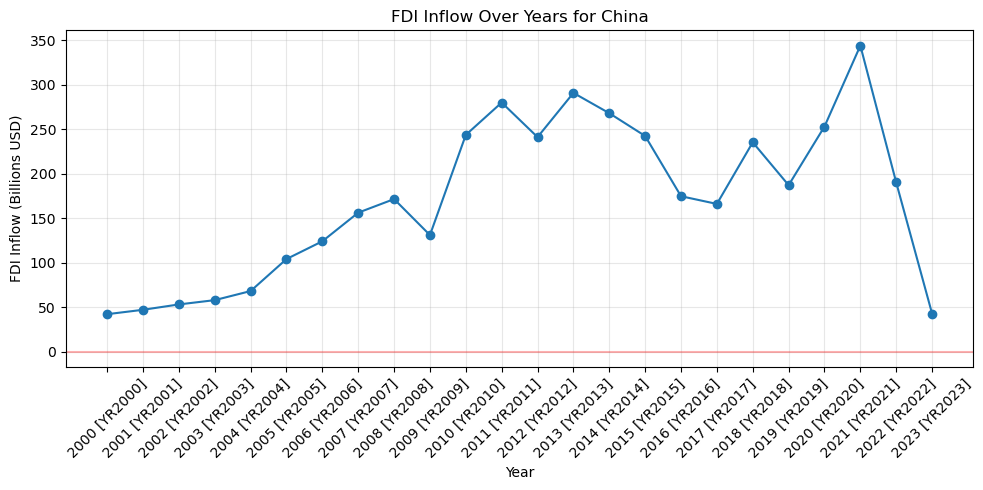

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = '/Users/User/Desktop/P_Popular Indicators (1)/6e33f2ce-9670-4af8-94be-742822d18827_Data.csv'
wb_fdi = pd.read_csv(file_path, encoding='utf-8')

country_name = 'China'

# Filter using the exact series name
fdi_data = wb_fdi[wb_fdi['Series Name'] == 'Foreign direct investment, net inflows (BoP, current US$)']
country_data = fdi_data[fdi_data['Country Name'] == country_name]

if country_name not in wb_fdi['Country Name'].values:
    print(f"Error: {country_name} not found in the dataset.")
elif country_data.empty:
    print(f"No FDI data available for {country_name}.")
else:
    years = country_data.columns[4:]
    fdi_values = pd.to_numeric(country_data.iloc[0, 4:].values, errors='coerce')

# Create the plot with proper scaling
plt.figure(figsize=(10, 5))
plt.plot(years, fdi_values/1e9, marker='o', linestyle='-')  # Convert to billions for better readability
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)  # Add a horizontal line at y=0
plt.grid(True, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('FDI Inflow (Billions USD)')
plt.title(f'FDI Inflow Over Years for {country_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()